# Learning Matplotlib



---



Matplotlib is a python library used to plot static as well as dynamic graphs

Before using it we have to import it just like we did it with numpy and pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mathplotlib can be used in two different modes :

*   matplotlib inline : This mode gives us normal static graphs to work with
*   matplotlib notebook : This mode gives us dynamic and interactive graphs

Inline mode is the most used mode for Machine Learning



In [ ]:
%matplotlib inline

### Basics of Plotting a graph

Now, we'll try plotting some trigonometric functions using matplotlib

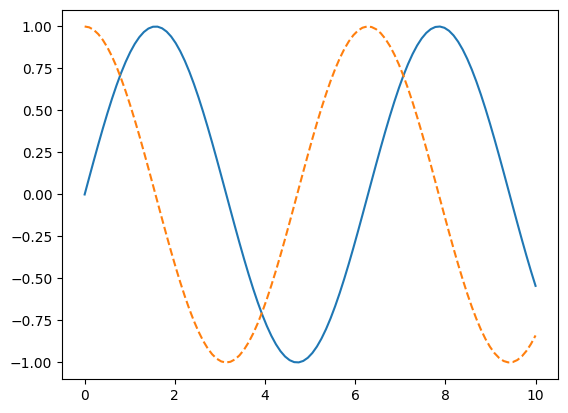

In [ ]:
# We did it with default axes
fig = plt.figure()
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x),'--')

The numpy function **linspace(intital,final,step)** creates an numpy array from intital value to the final value with the incremental value which is passed to the function

We can also save this file using the function **savefig("name.png")**

In [ ]:
fig.savefig("my_figure.png")

We can also do the same using a different method (Rare)

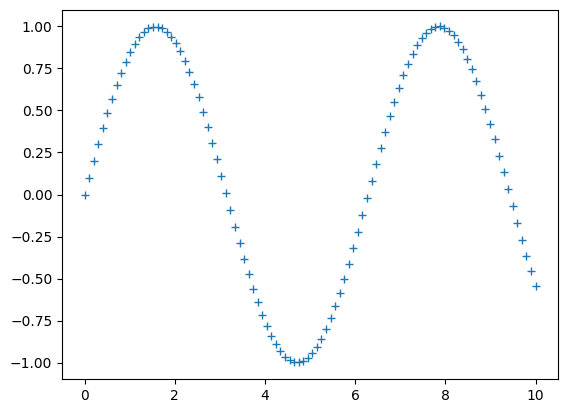

In [ ]:
# We defined explicitly the axes
fig = plt.figure()
ax = plt.axes() # This is used to create axes
x = np.linspace(0,10,100)
ax.plot(x,np.sin(x),"+")

We'll use the stock price data set from NASDAQ for learning this library

So let's read the csv (comma seprated values) file

In [ ]:
stock_prices = pd.read_csv("/content/stock_prices.csv")
stock_prices

,Date,Microsoft,Google,Apple,Netflix,Amazon,Meta
0,12/28/2023,375.28,141.28,193.58,490.51,153.38,358.32
1,12/27/2023,374.07,141.44,193.15,491.79,153.34,357.83
2,12/26/2023,374.66,142.82,193.05,491.19,153.41,354.83
3,12/22/2023,374.58,142.72,193.60,486.76,153.42,353.39
4,12/21/2023,373.54,141.80,194.68,491.61,153.84,354.09
...,...,...,...,...,...,...,...
244,01/09/2023,227.12,88.80,130.15,315.17,87.36,129.47
245,01/06/2023,224.93,88.16,129.62,315.55,86.08,130.02
246,01/05/2023,222.31,86.77,125.02,309.70,83.12,126.94
247,01/04/2023,229.10,88.71,126.36,309.41,85.14,127.37


Now, let's try to plot some of the company's stock prices vs the dates, but before that we need to convert the date in the dataset to pandas datetime format for that we'll use the **to_datetime()** function

### Plotting Line Graphs

**Some important functions for plotting graphs**

*   **figsize=(height,width)**: This function is used to adjust size values of the graph which we are plotting
*   **xlabel()** and **ylabel**: These function are used to name the x-axis and the y-axis
*   **title()**: This function is used to give title to the graph
*   **show()**: This function is used to show the graph as output



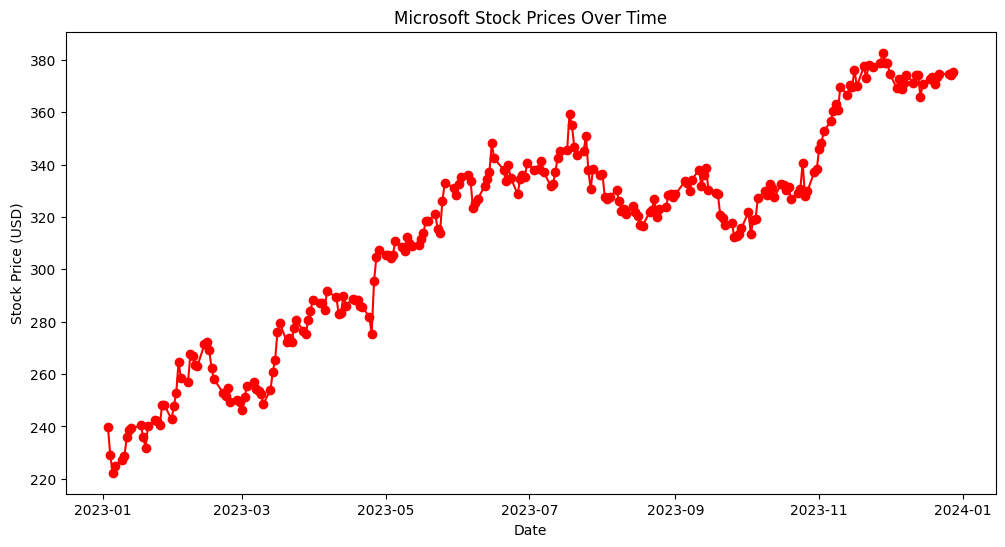

In [ ]:
stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])
plt.figure(figsize=(12,6)) # Width, Height
plt.plot(stock_prices["Date"],stock_prices["Microsoft"],color='r',label="Microsoft",marker='o')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Microsoft Stock Prices Over Time")
plt.show()

The **legend()** function is used to label the graph

Now, let's plot all the companies stock price graph together

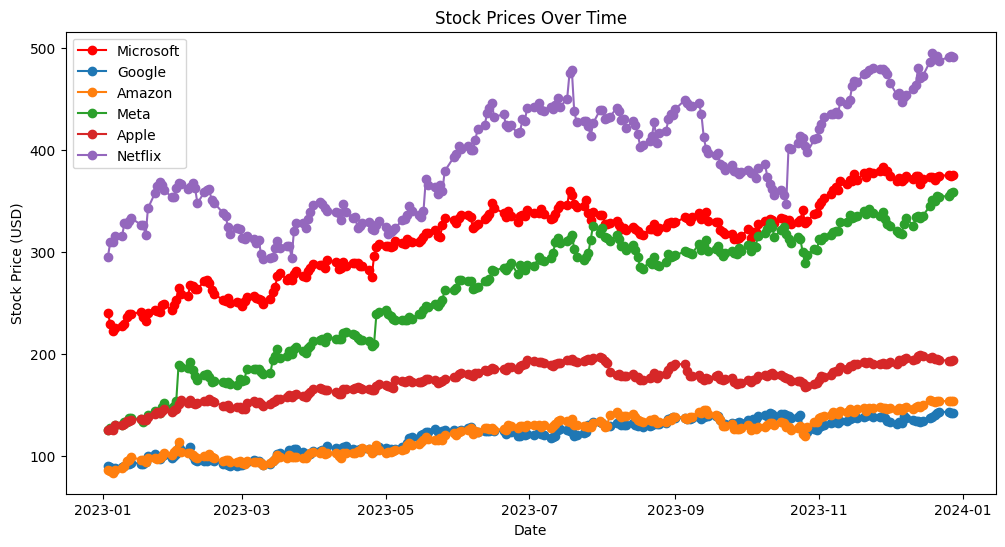

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(stock_prices["Date"],stock_prices["Microsoft"],color='r',label="Microsoft",marker='o')
plt.plot(stock_prices["Date"],stock_prices["Google"],label="Google",marker='o')
plt.plot(stock_prices["Date"],stock_prices["Amazon"],label="Amazon",marker='o')
plt.plot(stock_prices["Date"],stock_prices["Meta"],label="Meta",marker='o')
plt.plot(stock_prices["Date"],stock_prices["Apple"],label="Apple",marker='o')
plt.plot(stock_prices["Date"],stock_prices["Netflix"],label="Netflix",marker='o')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Stock Prices Over Time")
plt.legend()
plt.show()

### Plotting Bar Graphs


Now, as we have seen that we can plot the normal charts using the above methods so, let's try to print the above data using a bar graph

But, for that we need to reshape the dataframe so we'll use the **melt()** function to do so

In [ ]:
latest_prices = stock_prices.head().melt(id_vars="Date", var_name="company", value_name="Stock Price")
latest_prices

,Date,company,Stock Price
0,2023-12-28,Microsoft,375.28
1,2023-12-27,Microsoft,374.07
2,2023-12-26,Microsoft,374.66
3,2023-12-22,Microsoft,374.58
4,2023-12-21,Microsoft,373.54
5,2023-12-28,Google,141.28
6,2023-12-27,Google,141.44
7,2023-12-26,Google,142.82
8,2023-12-22,Google,142.72
9,2023-12-21,Google,141.80


So we have three parameters that play an important role in this reshaping

* id_vars : This will make the column as an identifier element
* var_name : This will melt the columns having string value into one single column
* value_name : This will melt the columns having numeric value

Now let's plot the bar graph

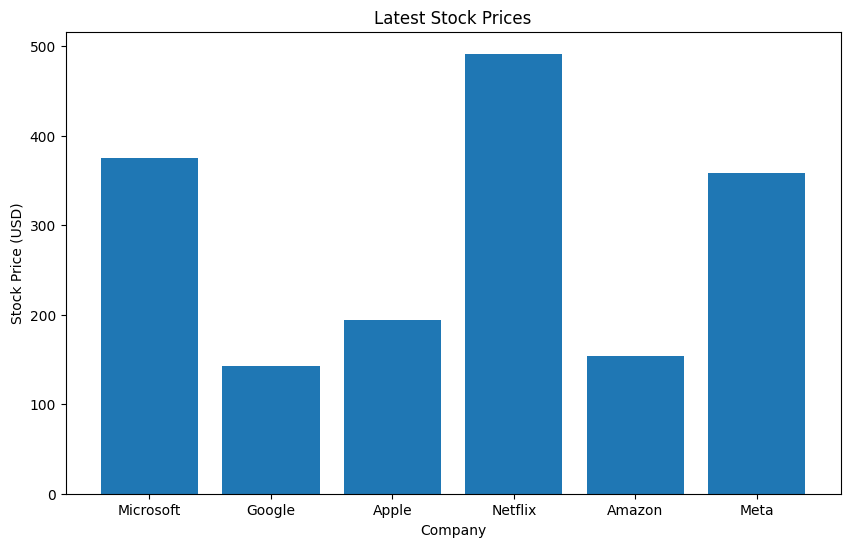

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(latest_prices["company"], latest_prices["Stock Price"]) # bar(x_axis, y_axis)
plt.xlabel("Company")
plt.ylabel("Stock Price (USD)")
plt.title("Latest Stock Prices")
plt.show()

So as we can see that instead of using the plot() function we have used the bar() function

And note that the y-axis value will be decided via the first occurence

### Plotting Histogram

Is the most commonly used graph to show frequency distributions

So now, let's try to plot an histogram for the stock price of Microsoft

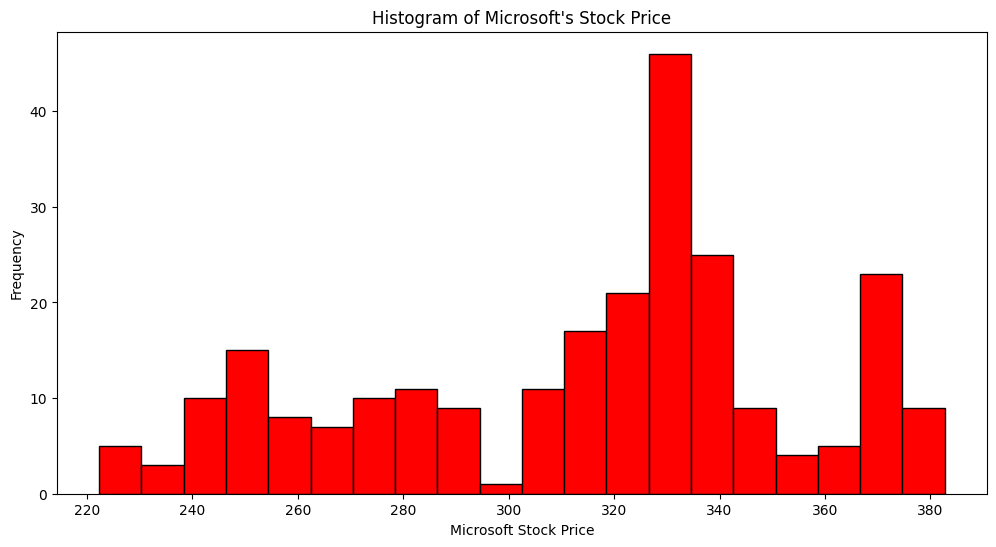

In [86]:
plt.figure(figsize=(12,6))
plt.hist(stock_prices["Microsoft"],bins = 20, color = "red", edgecolor = "black")
plt.xlabel("Microsoft Stock Price")
plt.ylabel("Frequency")
plt.title("Histogram of Microsoft's Stock Price")
plt.show()

### Correlation
A statistical measure that expresses the extent to which two variables are linearly related

*   Positive Correlation: If the points generally form an upward-sloping pattern, it suggests a positive correlation. In other words, when Microsoft stock prices increase, Google stock prices tend to increase as well.

*   Negative Correlation: Conversely, if the points form a downward-sloping pattern, it suggests a negative correlation. This means that as Microsoft stock prices go up, Google stock prices tend to go down, and vice versa.

*   No Correlation: If the points are scattered without a clear pattern, it suggests no correlation. Changes in Microsoft stock prices do not seem to be related to changes in Google stock prices.

*   Strength of Correlation: The tighter the cluster of points, the stronger the correlation. If the points are spread out, the correlation may be weaker.

*   Outliers: Identify any points that do not follow the general pattern. Outliers may indicate unusual events or factors affecting one of the stocks.



### Scatter Plot

It is a way to study correlation. We'll use the **scatter()** function in order plot this

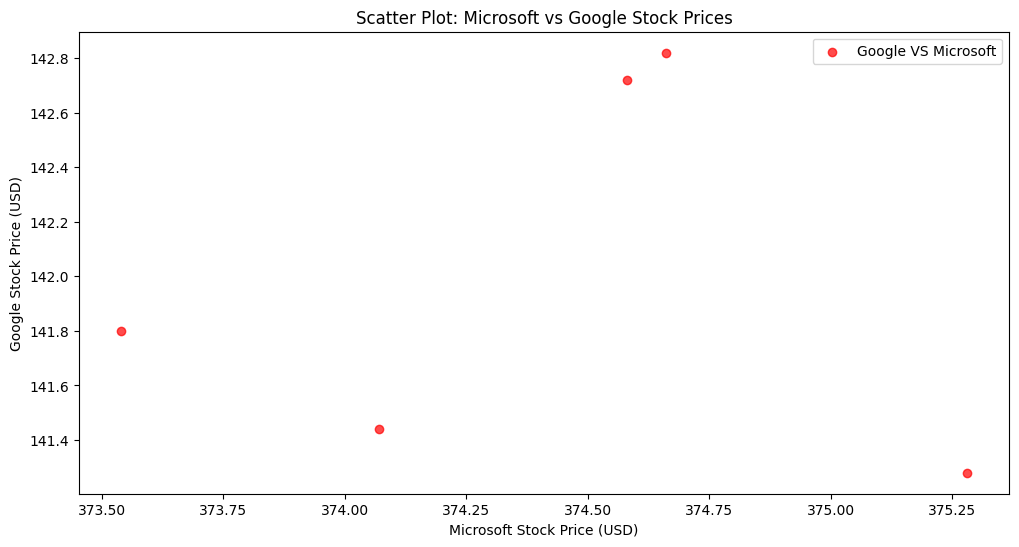

In [95]:
plt.figure(figsize=(12,6))
plt.scatter(latest_prices[latest_prices["company"] == "Microsoft"]["Stock Price"],
            latest_prices[latest_prices["company"] == "Google"]["Stock Price"],
            c='red', label="Google VS Microsoft",alpha=0.7)
# label is necessary for the legend no idea directly
# alpha is the transparency
# used to compare two columns
plt.xlabel("Microsoft Stock Price (USD)")
plt.ylabel("Google Stock Price (USD)")
plt.title("Scatter Plot: Microsoft vs Google Stock Prices")
plt.legend()
plt.show()

### Brief about Seaborn

It is build on top of the Matplotlib libray in order to avoid the irritating syntax and to make things modularize

Let's convert a matplotlib graph into a seaborn graph

In [96]:
import seaborn as sns

In [97]:
sns.set() # This basically converts all the normal matplotlib graphs to Seaborn graphs

Now, let's plot the bar graph of Microsoft stock price histogram without any changes using seaborn

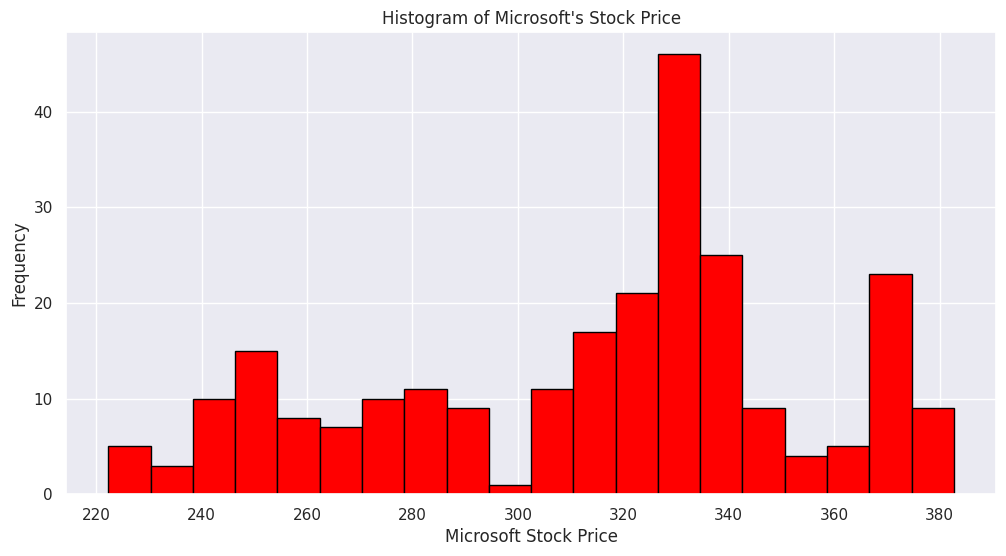

In [99]:
plt.figure(figsize=(12,6))
plt.hist(stock_prices["Microsoft"],bins = 20, color = "red", edgecolor = "black")
plt.xlabel("Microsoft Stock Price")
plt.ylabel("Frequency")
plt.title("Histogram of Microsoft's Stock Price")
plt.show()

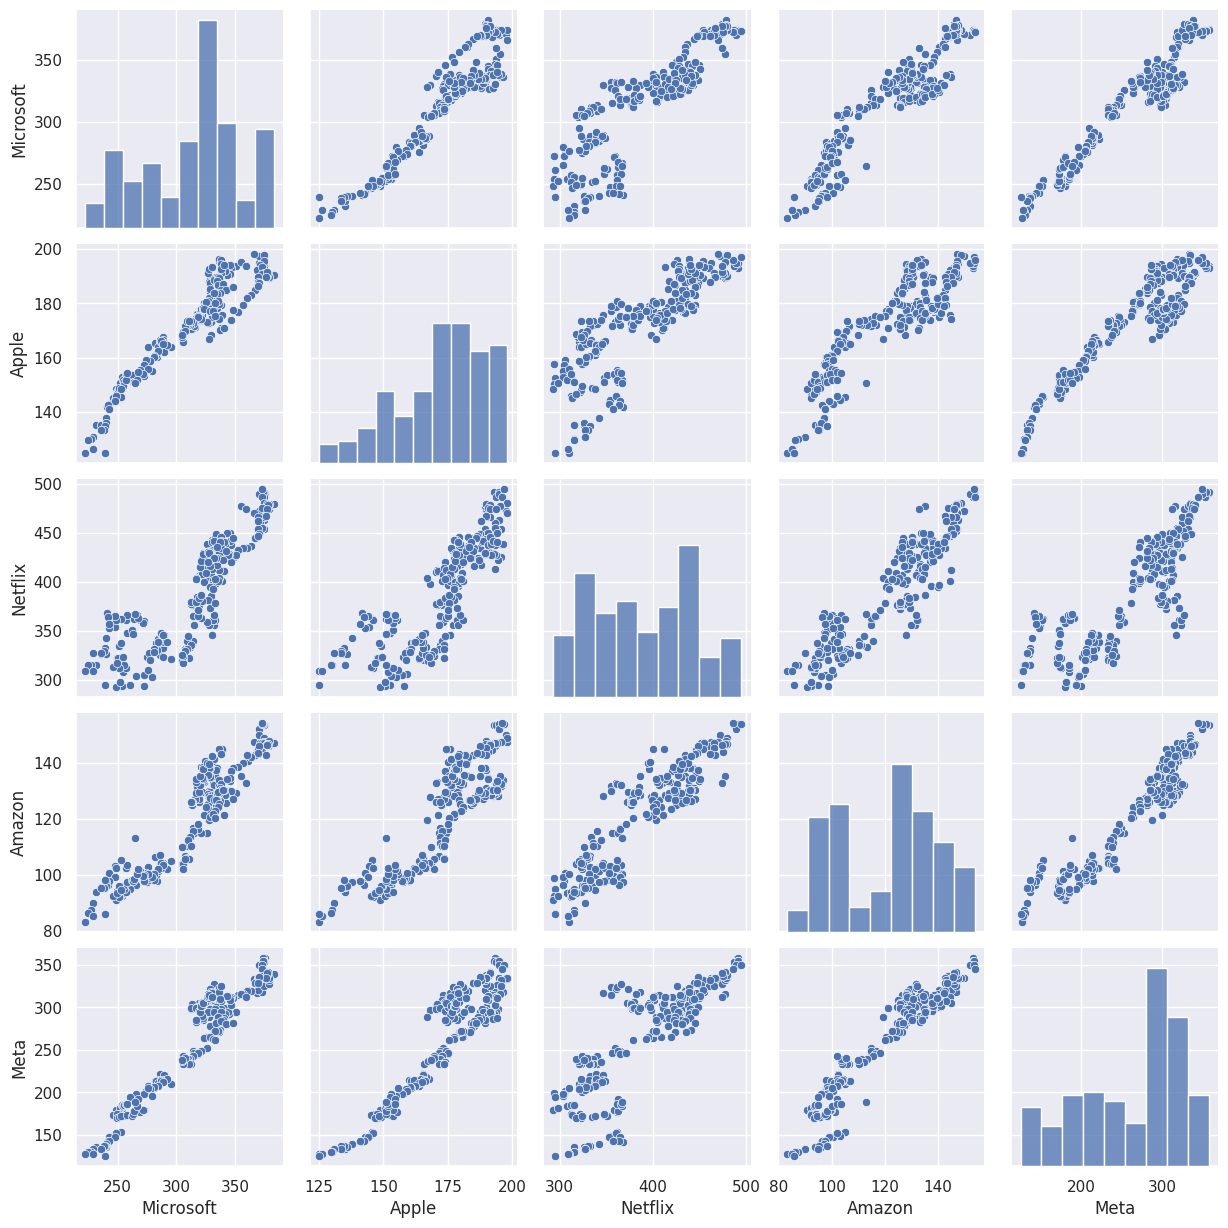

In [102]:
sns.pairplot(stock_prices[['Microsoft','Apple','Netflix','Amazon','Meta']])
plt.show()